In [1]:
# Import required libraries and dependencies
# Set environment variable to avoid KMeans memory leak on Windows with MKL
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import hvplot as hv




In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [5]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)


# Copy the crypto names from the original data
market_data_df_scaled  = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Set the coinid column as index
market_data_df_scaled.index = market_data_df.index

# Display sample data
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertial_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto')
    model.fit(market_data_df_scaled)
    inertial_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
plot_data = {"k": k_values, "inertia": inertial_values}

# Create a DataFrame with the data to plot the Elbow curve
elbo_curve_df = pd.DataFrame(plot_data)

# Display the DataFrame
elbo_curve_df

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Inertia'>

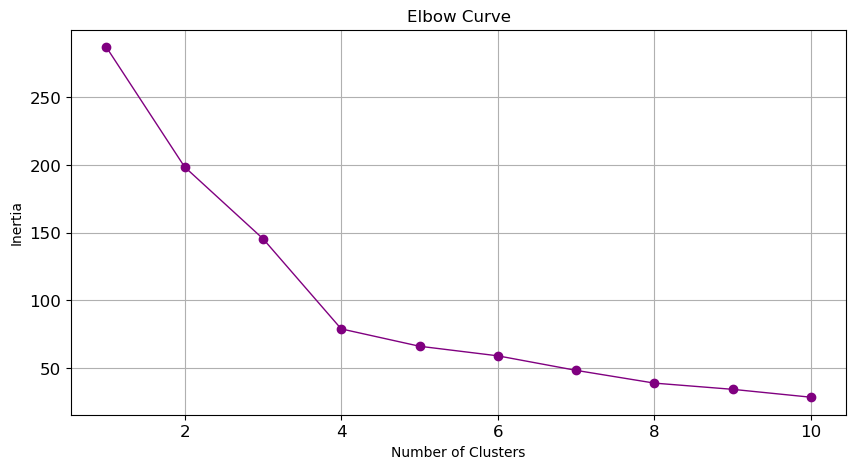

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbo_curve_df.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xlabel="Number of Clusters",
    ylabel="Inertia",
    figsize=(10, 5),
    rot=0,
    grid=True,
    legend=False,
    marker="o",
    color="purple",
    linestyle="-",
    linewidth=1,
    fontsize=12,
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4, as it represents the most significant reduction in inertia.  Addiing clusters beyond this point will likely not add any additional value.  If viewed as an "arm", k = 4 is the most visually apparent "elbow" represented by this data set. There could be specific use case arguments made for adding additional clusters depending on the business needs.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
k = 4
model = KMeans(n_clusters=k, random_state=0, n_init='auto')


In [9]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df_scaled)    

KMeans(n_clusters=4, random_state=0)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(market_data_df_scaled)

# View the resulting array of cluster values.
predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [11]:
# Create a copy of the DataFrame
market_data_df_clustered = market_data_df_scaled.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_clustered["class"] = model.labels_

# Display sample data
market_data_df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: title={'center': 'Crypto Market Clusters'}, xlabel='Price Change Percentage 24h', ylabel='Price Change Percentage 7d'>

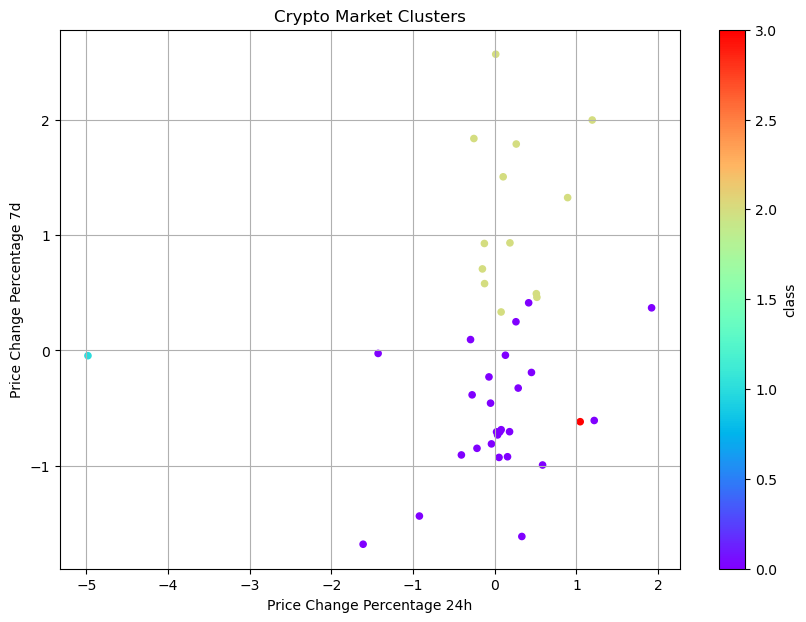

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_clustered.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="class",
    colormap="rainbow",
    figsize=(10, 7),
    title="Crypto Market Clusters",
    xlabel="Price Change Percentage 24h",
    ylabel="Price Change Percentage 7d",
    grid=True,
)


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(market_data_df_scaled)

# View the first five rows of the DataFrame. 
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_variance = np.sum(explained_variance)
print(f"The explained variance is: {explained_variance}")
print(f"The total explained variance is: {total_variance}")


The explained variance is: [0.3719856  0.34700813 0.17603793]
The total explained variance is: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The toal explained variance is 0.8950316570309841.  This indicates that the use of 3 principal components represents nearly 90% of the data.

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
new_df_pca = pd.DataFrame(
    data=pca_data, columns=["PC1", "PC2", "PC3"], index=market_data_df.index
)
# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
crypto_names_df = pd.DataFrame(crypto_names, columns=["coin_id"])

# Display sample data
new_df_pca.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto')
    model.fit(new_df_pca)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
new_df_pca = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
new_df_pca_plot = pd.DataFrame(new_df_pca)

# Display the DataFrame
new_df_pca_plot

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


<Axes: title={'center': 'Elbow Curve-PCA'}, xlabel='Number of Clusters', ylabel='Inertia'>

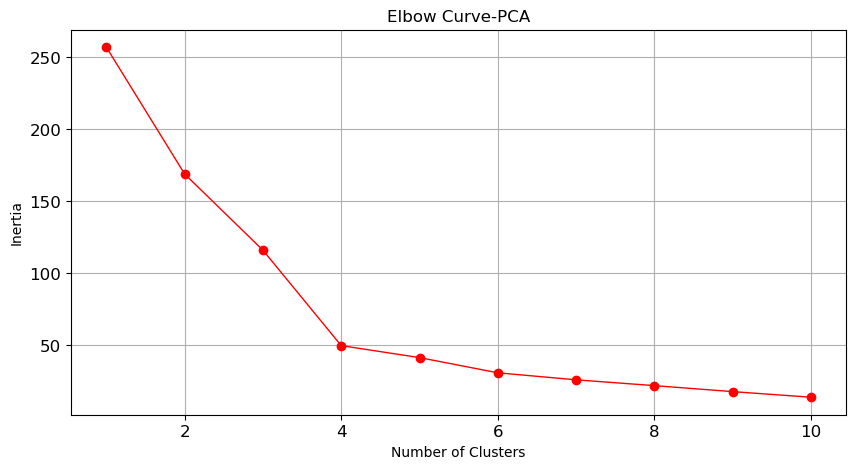

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
new_df_pca_plot.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve-PCA",
    xlabel="Number of Clusters",
    ylabel="Inertia",
    figsize=(10, 5),
    rot=0,
    grid=True,
    legend=False,
    marker="o",
    color="red",
    linestyle="-",
    linewidth=1,
    fontsize=12,
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data is 4.  It is the most pronounced angular/inertial change and represents the "elbow".


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best k values are the same between the PCA data and the original data.  While the individual inertial values change, the changes are slight and consistent, meaning the relative angles per k value are very similar.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
new_df_pca = pd.DataFrame(
    data=pca_data, 
    columns=["PCA1", "PCA2", "PCA3"], 
    index=market_data_df.index
)

In [21]:
# Initialize the K-Means model using the best value for k
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0, n_init='auto')

In [22]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(new_df_pca[["PCA1", "PCA2", "PCA3"]])

KMeans(n_clusters=4, random_state=0)

In [23]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predictions = kmeans_model.predict(new_df_pca[["PCA1", "PCA2", "PCA3"]])

In [24]:
# Create a copy of the DataFrame with the PCA data
pca_df_clustered = new_df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_clustered["crypto_cluster"] = kmeans_model.labels_

# Display sample data
pca_df_clustered.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [32]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
plot = pca_df_clustered.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colorbar=True,
    cmap="winter",
    size=50,
    title="Crypto Market Clusters",
    xlabel="PCA1",
    ylabel="PCA2",
)
plot

:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [35]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=["PCA1", "PCA2", "PCA3"], index=market_data_df.columns)

pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**
** The strongest positive influence for PCA 1 is price_change_percentage_200d=0.594468.
** The strongest positive influence for PCA 2 is price_change_percentage_30d=0.562182.
** The strongest positive influence for PCA 3 is price_change_percentage_7d=0.787670.
** Overall this indicates that feature price_change_percentage_7d has the highest impact relative to short term crypto movements.  This may be of interest to day traders who are looking for a strategy for trading crypto currencies.

    